In [85]:
#import required packages

import pandas as pd 
import numpy as np
import gc
import time
import warnings
from scipy import sparse
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import string
from nltk.util import ngrams
import re 
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer   
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import  textblob
from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
from textblob import Word 
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
import spacy
from spacy import displacy
from spacy.matcher import Matcher

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")
lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()
%matplotlib inline

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [11]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score,pairwise_distances

# Importing data

In [185]:
data_jobpost=pd.read_csv("D:/Analytix labs/Assignments & Case Studies/Final Projects/6. Analyzing online Job Postings/data job posts.csv")

In [186]:
data_jobpost_1 = data_jobpost

In [15]:
data_jobpost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

In [16]:
# Important columns
data_jobpost=data_jobpost[['jobpost', 'Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC','Year', 'Month', 'IT']]

In [18]:
#Missing value Treatment
data_jobpost[['Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC']]=data_jobpost[['Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC']].fillna(data_jobpost[['Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC']].mode().ix[0])

In [19]:
data_jobpost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 10 columns):
jobpost           19001 non-null object
Title             19001 non-null object
Company           19001 non-null object
JobDescription    19001 non-null object
JobRequirment     19001 non-null object
RequiredQual      19001 non-null object
AboutC            19001 non-null object
Year              19001 non-null int64
Month             19001 non-null int64
IT                19001 non-null bool
dtypes: bool(1), int64(2), object(7)
memory usage: 1.3+ MB


# Look at the no of Jobs posted by title, year, month, company

Job posts by title:
Accountant                                356
Chief Accountant                          219
Medical Representative                    216
Sales Manager                             166
Administrative Assistant                  155
Lawyer                                    151
Software Developer                        134
Project Manager                           117
English Language Courses                  109
Web Developer                             101
Java Developer                             88
Marketing Specialist                       87
Office Manager                             85
Receptionist/ Administrative Assistant     77
Graphic Designer                           75
System Administrator                       75
Marketing Manager                          72
Senior Java Developer                      69
Software Engineer                          69
QA Engineer                                66
PHP Developer                              65
Senior Softwar

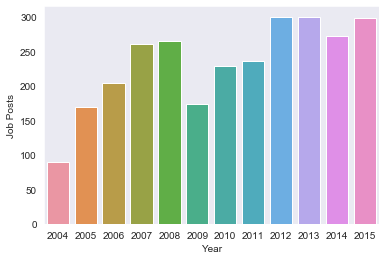



Job posts by month:
    Month  data
10      1   222
1       2   253
0       3   256
9       4   225
6       5   229
4       6   232
7       7   228
5       8   231
2       9   250
3      10   239
8      11   227
11     12   203


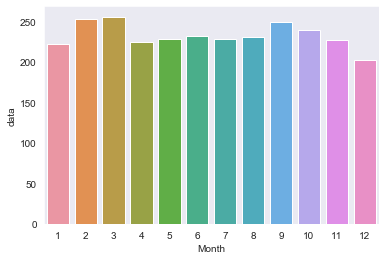



Job posts by company:
                                Company  Job Posts
0                     Career Center NGO        178
1                         SAS Group LLC         28
2  Virtual Solution Global Services LLC         23
3                         ArmenTel CJSC         23
4                Boomerang Software LLC         21
5                        IUNetworks LLC         17
6                 Synopsys Armenia CJSC         15
7                         Joomag AM LLC         15
8         Energize Global Services CJSC         14
9                    EPAM Systems, Inc.         14


jobs posted by title in every year
    Year  Title
11  2004     90
10  2005    169
8   2006    204
5   2007    260
4   2008    265
9   2009    173
7   2010    229
6   2011    236
0   2012    300
1   2013    299
3   2014    272
2   2015    298


In [30]:
# Number of job posted by titles
titles = data_jobpost['Title'].value_counts()[:25]
keys = titles.keys().to_list()
data_jobpost = data_jobpost[data_jobpost['Title'].isin(keys)]
print('Job posts by title:')
print(data_jobpost['Title'].value_counts())

# Number of job posted by year
year=pd.DataFrame(data_jobpost.Year.value_counts().reset_index())
year['Job Posts']=year.Year
year['Year']=year['index']
year.drop('index',axis=1,inplace=True)
year.sort_values(by='Year',inplace=True)
print('\n')
print('Job posts by year:')
print(year)

sns.barplot(x='Year',y='Job Posts',data=year)
plt.show()

# Number of job posted by month
month=pd.DataFrame(data_jobpost.Month.value_counts().reset_index())
month['data']=month.Month
month['Month']=month['index']
month.drop('index',axis=1,inplace=True)
month.sort_values(by='Month',inplace=True)
print('\n')
print('Job posts by month:')
print(month)

sns.barplot(x='Month',y='data',data=month)
plt.show()

# Number of job posted by company
com=pd.DataFrame(data_jobpost.Company.value_counts().reset_index())
com['Job Posts']=com.Company
com['Company']=com['index']
com.drop('index',axis=1,inplace=True)
com.sort_values(by='Job Posts',inplace=True,ascending=False)
print('\n')
print('Job posts by company:')
print(com.head(10))

# Numb er of jobs posted by title in every year
yr=pd.DataFrame(data_jobpost.Year.value_counts().reset_index())
yr['Title']=yr.Year
yr['Year']=yr['index']
yr.drop('index',axis=1,inplace=True)
yr.sort_values(by='Year',inplace=True)
print('\n')
print('jobs posted by title in every year')
print(yr)

# User defoned function for finding top job posting every year from 2004-2015

In [26]:
year_range = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

graph to show job posting for year 2004


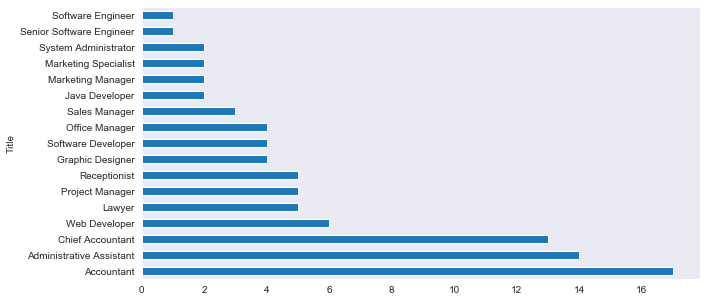

graph to show job posting for year 2005


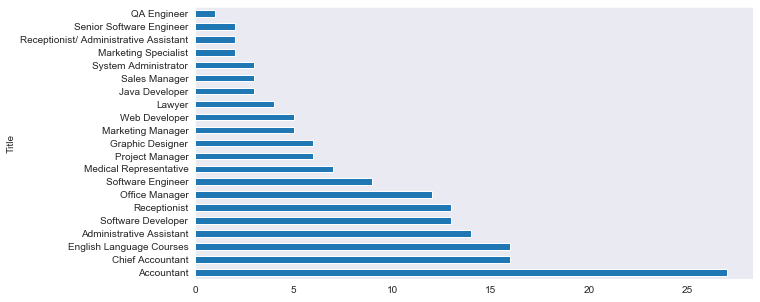

graph to show job posting for year 2006


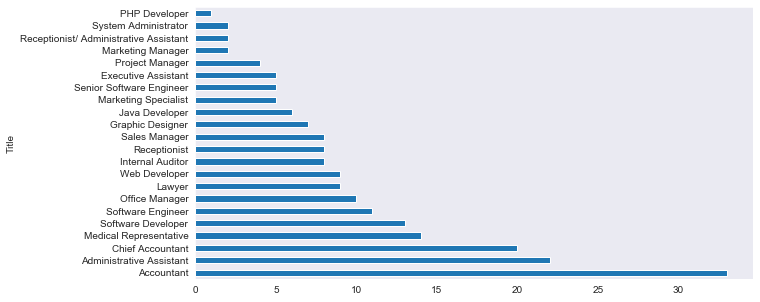

graph to show job posting for year 2007


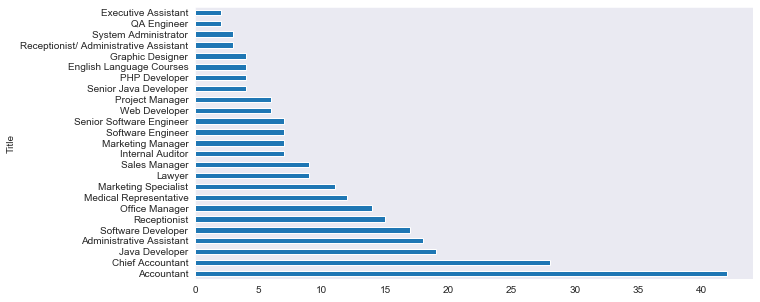

graph to show job posting for year 2008


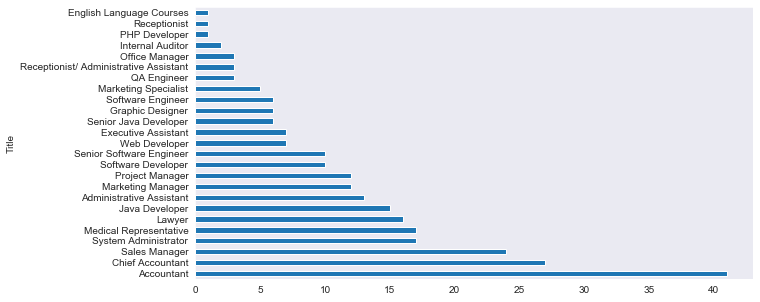

graph to show job posting for year 2009


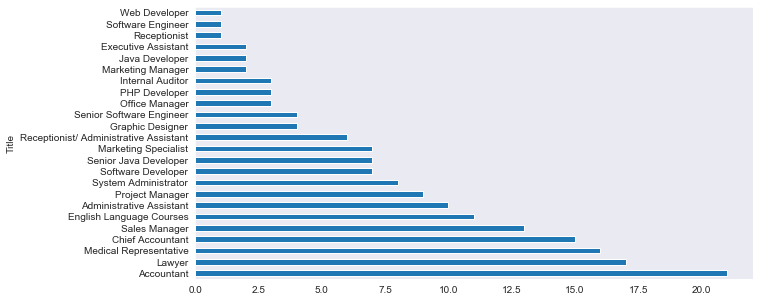

graph to show job posting for year 2010


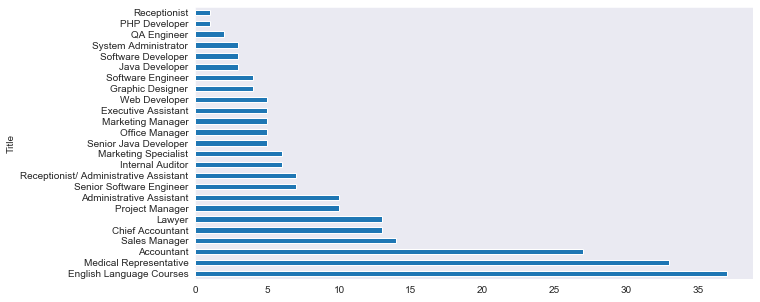

graph to show job posting for year 2011


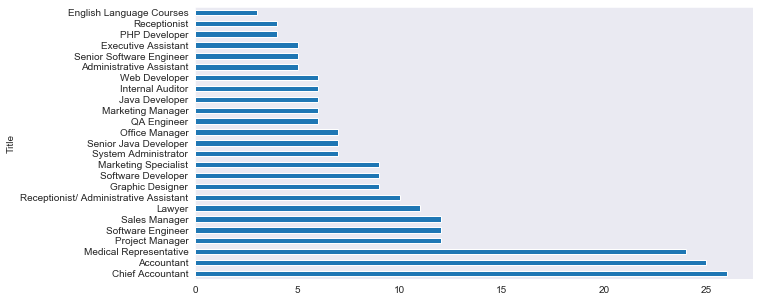

graph to show job posting for year 2012


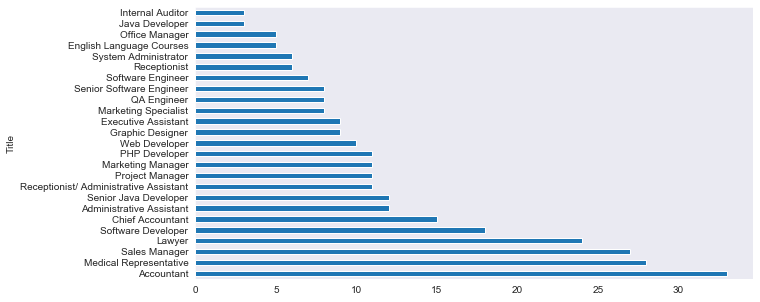

graph to show job posting for year 2013


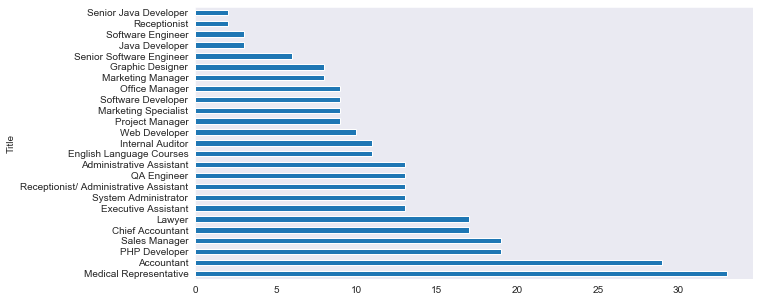

graph to show job posting for year 2014


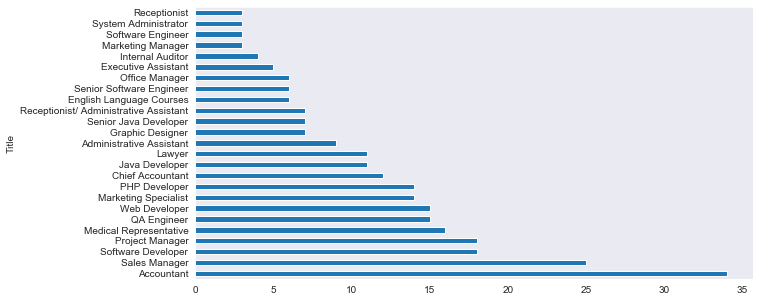

graph to show job posting for year 2015


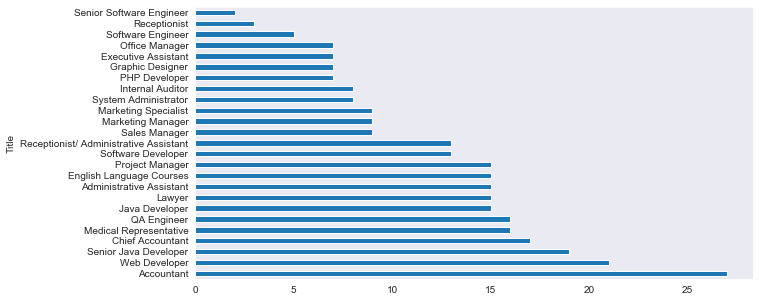

In [28]:
def jobpost_by_year(year_range):
    for year_no in year_range:
        year_1=data_jobpost[data_jobpost.Year==year_no].groupby('Title').count().sort_values('jobpost',ascending=False)
        plt.figure(figsize=(10, 5))
        year_1.jobpost.plot('barh')
        print('graph to show job posting for year {}'.format(year_no))
        plt.show()
        
jobpost_by_year(year_range)

# Basic exploratory analysis

In [34]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [35]:
df=data_jobpost[['RequiredQual','IT']]

In [36]:
df['RequiredQual'] = df['RequiredQual'].astype(str)

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'pron')) 


# calculating sentiment analysis using textblob module

In [37]:
df['sentiment'] = df["RequiredQual"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [38]:
df.IT.value_counts()

False    2131
True      664
Name: IT, dtype: int64

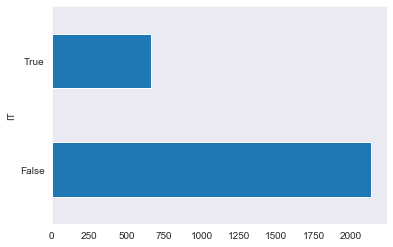

In [39]:
df.groupby('IT')['RequiredQual'].count().plot('barh')
plt.show()

In [40]:
# convert label to a numeric variable
df['IT'] = np.where(df.IT==False,0,1)

In [41]:
df['IT'].value_counts()

0    2131
1     664
Name: IT, dtype: int64

# Now splitting data in to train and test

In [42]:
# train features and labels 
y = df['IT']
X = df['RequiredQual']

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2375,)
(420,)
(2375,)
(420,)


# Creating using defined functions to preprocessing the data and cleaning the text

In [43]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [44]:
stop = set(nltk.corpus.stopwords.words('english'))

In [45]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text)     #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
   # text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
   # text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [46]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [47]:
X_train=pre_process(X_train)
X_test =pre_process(X_test)

In [49]:
X_train

16507    master degree least year relevant experience d...
8872     is ba year relevant experience ability accept ...
5483     successful candidate good command english lang...
6006     university degree technical least year work ex...
4591     university degree preferably accounting busine...
                               ...                        
18794    excellent communication skill good oral writte...
5883     university degree relevant professional backgr...
7234     higher education good knowledge verbal written...
1879     university degree relevant field minimum two y...
6962     university degree relevant field minimum year ...
Name: RequiredQual, Length: 2375, dtype: object

# Using TF-IDF & count vectorization for both testing and training

In [51]:
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(2, 3),  
                             encoding='latin-1',
                             max_df=0.9,min_df=0.001)
#Train
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

In [52]:
xtrain_count

<2375x15754 sparse matrix of type '<class 'numpy.int64'>'
	with 156635 stored elements in Compressed Sparse Row format>

# Document Term Mertices

In [56]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [57]:
dtm2.head()

,a engineer,a engineer experience,a engineer role,a engineer software,a experience,a process,a process methodology,a self,a self process,ability ability,...,year supervisor responsibility,year technical,year technical experience,year upper,year upper management,year web,year work,year work experience,year working,year working experience
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.055189,0.055276,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [58]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(2, 3),max_df=0.9,min_df=0.001)
tfidf_vect_ngram.fit(df['RequiredQual'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [59]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(2,3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram_chars.fit(df['RequiredQual'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

# Topic Modeling

In [60]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=15, learning_method='batch', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [61]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['pharmaceutical medical education pharmaceutical medical higher pharmaceutical medical higher pharmaceutical medical education work effectively team effectively team language preferred communication networking communication networking skill',
 'knowledge cava work experience cava experience cava knowledge database proficient microsoft skill proficient basic knowledge web development computer skill proficient excellent verbal written',
 'good knowledge education good knowledge education good field study higher education good appropriate field study least year study least appropriate field study year practical experience',
 'part team work part team work part ability work part testing tool field communication field communication skill relevant field communication part team excellent team excellent knowledge',
 'communication skill eager learn task timely manner basic computer internet ability complete basic computer ability complete task complete task complete task timely plus basic',
 

# Count online job data-words and create a dictionary

In [62]:
frequency_words_stop= {}
for data in df['RequiredQual']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_stop:
                count = frequency_words_stop[token]
                count = count + 1
                frequency_words_stop[token] = count
            else:
                frequency_words_stop[token] = 1

In [63]:
frequency_words_stop

{'-': 24977,
 'university': 871,
 'degree': 1523,
 ';': 19026,
 'economical': 6,
 'background': 137,
 'plus': 1454,
 'excellent': 2349,
 'knowledge': 6047,
 'windows': 203,
 '2000': 23,
 'server': 331,
 ',': 11178,
 'networking': 79,
 'tcp': 30,
 '/': 1656,
 'ip': 44,
 'technologies': 368,
 'ms': 1016,
 'sql': 374,
 'visual': 38,
 'basic': 365,
 '6': 44,
 'least': 1285,
 '2': 617,
 'years': 1623,
 'experience': 4435,
 'database': 219,
 'software': 1009,
 'development': 885,
 'good': 2224,
 'english': 2346,
 '.': 3652,
 'remuneration': 3,
 ':': 791,
 'commensurate': 6,
 'norms': 14,
 'accepted': 47,
 'company': 148,
 'gd': 1,
 'creative': 124,
 'innovative': 28,
 'great': 12,
 'capacity': 40,
 'implement': 20,
 'stylish': 1,
 'ideas': 36,
 'open': 243,
 'new': 134,
 'trends': 5,
 'fine': 5,
 'arts': 5,
 'extensive': 70,
 'graphic': 69,
 'design': 409,
 'marketing': 384,
 'communications': 90,
 'tools': 234,
 'required': 83,
 'well': 329,
 'thorough': 45,
 'adobe': 131,
 'photoshop': 111

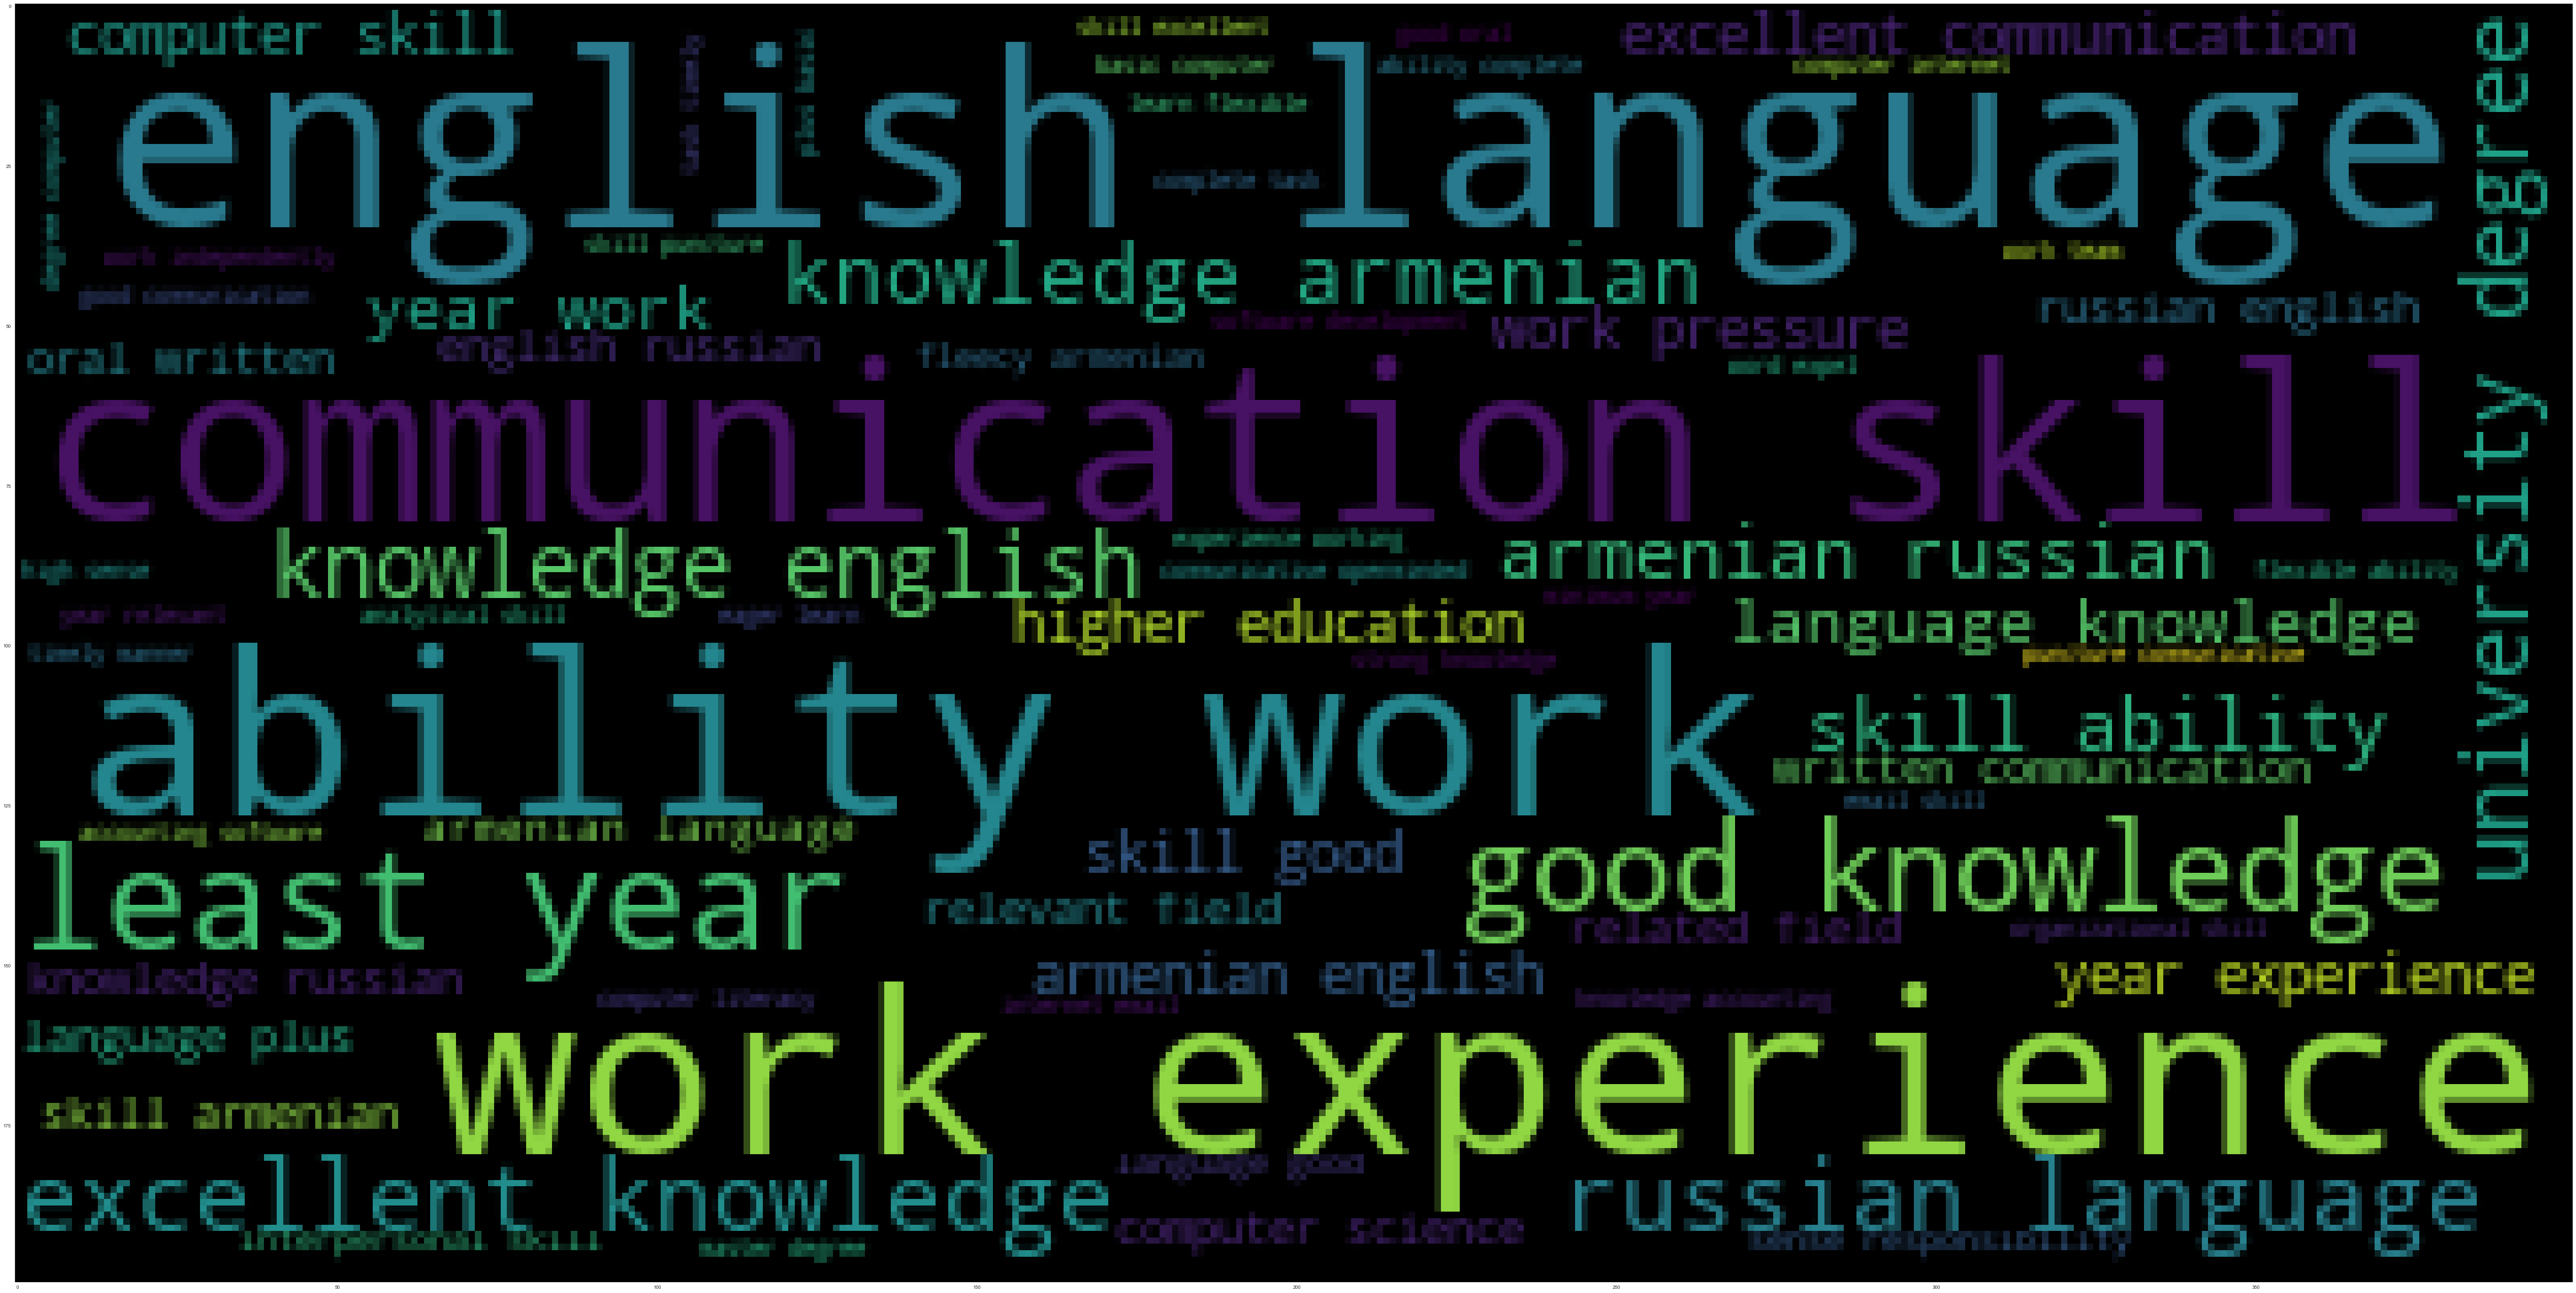

In [64]:
#Visual representation using wordcloud
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

# Create user defined function for train the models

In [65]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    
    return metrics.accuracy_score(predictions, valid_y)

# Building multiple models with different vectors like Naive bayes, logistic regression, linear SVM, Random forest

 - Naive Bayes

In [66]:
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("Count Vectors: ", accuracy_L1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("WordLevel TF-IDF: ", accuracy_L1)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("N-Gram Vectors: ", accuracy_L1)


# Naive Bayes on Character Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("CharLevel Vectors: ", accuracy_L1)

Count Vectors:  0.9571428571428572
WordLevel TF-IDF:  0.9666666666666667
N-Gram Vectors:  0.8642857142857143
CharLevel Vectors:  0.930952380952381


- Logistics regression

In [67]:
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("N-Gram Vectors: ", accuracy_L1)



# Logistic Regression on Character Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("CharLevel Vectors: ", accuracy_L1)

Count Vectors:  0.9476190476190476
WordLevel TF-IDF:  0.9666666666666667
N-Gram Vectors:  0.9214285714285714
CharLevel Vectors:  0.9714285714285714


- Linear SVM

In [68]:
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("Count Vectors: ", accuracy_L1)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("WordLevel TF-IDF: ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("N-Gram Vectors: ", accuracy_L1)



# Linear SVC on Character Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("CharLevel Vectors: ", accuracy_L1)

Count Vectors:  0.9738095238095238
WordLevel TF-IDF:  0.9666666666666667
N-Gram Vectors:  0.9666666666666667
CharLevel Vectors:  0.9904761904761905


 - Random Forest

In [69]:
# Random Forest on Count Vectors and TF-IDF
accuracy_L1 = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("Count Vectors: ", accuracy_L1)



# Random Forest on Word Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("WordLevel TF-IDF: ", accuracy_L1)



# Random Forest on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("N-Gram Vectors: ", accuracy_L1)



# Random Forest on Character Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("CharLevel Vectors: ", accuracy_L1)

Count Vectors:  0.9619047619047619
WordLevel TF-IDF:  0.9523809523809523
N-Gram Vectors:  0.9333333333333333
CharLevel Vectors:  0.9761904761904762


# Adding Features to DTM

In [70]:
# create a DataFrame that only contains the IT=1 and IT=0
job_post = df[(df.IT==0)| (df.IT==1)]

# define X and y
feature_cols = ['RequiredQual','sentiment']
X = df[feature_cols]
y = df.IT

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [73]:
# use TfidfVectorizer with text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.9,min_df=0.001, ngram_range=(2,3))
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('RequiredQual', axis=1).shape

(2096, 13677)
(699, 13677)


(2096, 1)

In [74]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('RequiredQual', axis=1).shape

(2096, 3901)
(699, 3901)


(2096, 1)

In [75]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('RequiredQual', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('RequiredQual', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(699, 3902)

- Random forest

In [76]:
# use Random Forest with text column only
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm, y_train)
y_pred_class = rmf.predict(X_test_dtm,)
acc_rmf=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf

0.9728183118741058

In [77]:
# use Random Forest with all features
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm_extra, y_train)
y_pred_class = rmf.predict(X_test_dtm_extra)
acc_rmf1=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf1

0.9728183118741058

 - Logistics regression

In [78]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
acc_log=metrics.accuracy_score(y_test, y_pred_class)
acc_log

0.9814020028612304

In [79]:
# use logistic regression with all features
logreg= LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
acc_log1=metrics.accuracy_score(y_test, y_pred_class)
acc_log1

0.9799713876967096

- Linear SVM

In [80]:
# use SVM with text column only
sm =svm.LinearSVC()
sm.fit(X_train_dtm, y_train)
y_pred_class = sm.predict(X_test_dtm)
acc_svm=metrics.accuracy_score(y_test, y_pred_class)
acc_svm

0.9828326180257511

In [81]:
# use SVM with all features
svm1 = svm.LinearSVC()
svm1.fit(X_train_dtm_extra, y_train)
y_pred_class = svm1.predict(X_test_dtm_extra)
acc_svm1=metrics.accuracy_score(y_test, y_pred_class)
acc_svm1

0.9828326180257511

# Confusion matrix

Text(0.5, 16.0, 'Predicted label')

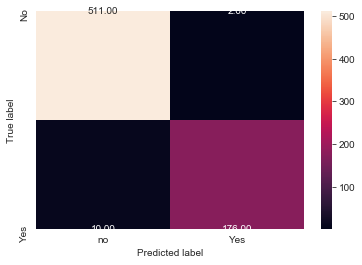

In [82]:
CM = metrics.confusion_matrix( y_test, y_pred_class)
sns.heatmap(CM, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [84]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','svm'],
    
    'Score': [acc_log,acc_rmf,acc_svm]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,svm,0.982833
0,Logistic Regression,0.981402
1,Random Forest,0.972818


# So, we got best accuracy by SVM  model.

# Unsupervised Learning

In [159]:
# Data Selection
data_1 = job_post[['RequiredQual']]

In [160]:
data_1['RequiredQual'] = data_1['RequiredQual'].astype(str)

In [161]:
def remove_punctuations(text):
    text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text)                # Remove punctuations
    text=text.lower()                                       # Convert text to lower
    return(text)

data_1['RequiredQual']=data_1['RequiredQual'].apply( lambda x: remove_punctuations(x))
data_1['RequiredQual'].head(4)

4     - university degree; economical background is ...
19    as a gd you are creative, innovative and have\...
20    - fluency in spoken and written english; knowl...
21    - university degree in jurisprudence;\n- exper...
Name: RequiredQual, dtype: object

In [162]:
#tokenize text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.1, max_df=0.9,
                             ngram_range=(1, 4), 
                             stop_words='english')
vectorizer.fit(data_1['RequiredQual'])

TfidfVectorizer(max_df=0.9, min_df=0.1, ngram_range=(1, 4),
                stop_words='english')

In [163]:
X_train = vectorizer.transform(data_1['RequiredQual'])
vocab = vectorizer.get_feature_names()

In [164]:
vocab[:10]

['ability',
 'ability work',
 'ability work pressure',
 'accounting',
 'analytical',
 'applications',
 'armenian',
 'armenian english',
 'armenian english languages',
 'armenian russian']

In [165]:
# get the tf-idf table 
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(data_1['RequiredQual'])

TfidfVectorizer(max_df=0.95, min_df=0.05, ngram_range=(1, 2),
                stop_words='english')

In [166]:
# Create a training data
X_train = vectorizer.transform(data_1['RequiredQual'])

In [167]:
# Use SVD to reduce dimensions
svd = TruncatedSVD(200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X_train)

In [168]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 99%


In [169]:
range_n_clusters = list (range(4,11))

In [170]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_lsa)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_lsa, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 4, silhouette score is 0.11502165612886645
For n_clusters = 5, silhouette score is 0.11466953912583602
For n_clusters = 6, silhouette score is 0.11589498659170351
For n_clusters = 7, silhouette score is 0.1155382298057659
For n_clusters = 8, silhouette score is 0.10534362450337866
For n_clusters = 9, silhouette score is 0.10862849606983255
For n_clusters = 10, silhouette score is 0.11156756804430885


In [171]:
# we create a kmeans model
model = KMeans(n_clusters=6, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)

In [172]:
# apply the model on this prepared data
res = model.fit(X_train)
res

KMeans(max_iter=100, n_clusters=6, n_init=1, random_state=5)

In [173]:
# Getting the vocalbulary as well as cluster centers
# Firstly, set of words from the tf-idf itself
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab)

In [174]:
# Then, the cluster centers from the model fit that we stored on res
cluster_centers = np.array(res.cluster_centers_)

In [175]:
x=np.array((0.1,10,0.05,1.5))
print(x)
print(x.argsort())
res.cluster_centers_[0].argsort()

[ 0.1  10.    0.05  1.5 ]
[2 0 3 1]


array([  0, 147, 148, 154, 157,  58, 169,  55, 171, 173, 174,  50,  49,
       175,  47, 176,  89,  44, 146, 143,  66, 141,  96,  99, 100, 102,
       114,  82, 116, 119,  43, 122, 124, 129, 130,  74, 131, 133, 139,
       140,  78, 188,  45,  40, 190, 211,  17,  16, 212, 218, 219, 209,
       221,   8,   7,   6, 232, 237,   2, 238,   9, 208,  90, 205, 193,
        37,  36,  35, 200,  33,  31, 206,  29, 202,  28,  27, 225, 216,
       204,  87,  19,  57, 167, 198,  20, 201,  72, 135,  51, 210, 215,
       121, 224, 217,  14, 123, 134,  70, 172,   4, 220, 226,  22,  67,
        39,  68, 113,  88,  71, 183,   5, 236, 126,  59, 127, 136, 234,
        48,  26, 163, 187, 242, 199, 235, 118, 158, 132, 145,  12, 117,
       197, 111, 177, 243, 144,  23,  13, 178,  94,  95,  10, 160, 239,
        86,  84, 105, 170,  60, 103, 159, 228, 168, 151, 152, 155, 214,
       196, 109,  83,  80, 150, 241,  21, 207, 189,  98, 203, 165, 166,
       164, 240, 179, 191, 192, 153, 227,  81, 181, 180, 115,  6

In [176]:
# sorting the cluster centers
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

In [177]:
# get top 10 words from that cluster
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
    print(words)

{'work', 'knowledge', 'knowledge english', 'language knowledge', 'medical', 'language', 'russian language', 'english language', 'advantage', 'skills'}
{'experience', 'work', 'programming', 'knowledge english', 'language knowledge', 'ability', 'language', 'good', 'java', 'plus', 'knowledge', 'web', 'development', 'medical', 'russian language', 'english language', 'advantage', 'skills'}
{'experience', 'communication skills', 'work', 'programming', 'ability complete', 'knowledge english', 'language knowledge', 'ability', 'language', 'good', 'communicative open', 'java', 'plus', 'computer internet', 'skills punctual', 'knowledge', 'web', 'development', 'medical', 'complete tasks', 'punctual communicative', 'russian language', 'english language', 'mail skills', 'basic computer', 'advantage', 'skills'}
{'experience', 'communication skills', 'work', 'programming', 'ability complete', 'knowledge english', 'language knowledge', 'ability', 'degree', 'management', 'language', 'good', 'communicati

In [178]:
words=list(words)

In [179]:
#add top words to train set
train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]

In [180]:
#train_set[,]
data_1.head()

,RequiredQual
4,- university degree; economical background is ...
19,"as a gd you are creative, innovative and have\..."
20,- fluency in spoken and written english; knowl...
21,- university degree in jurisprudence;\n- exper...
29,- university degree in finance or accounting;\...


In [181]:
# how many observations are in each cluster

data_1['cluster'] = model.labels_
data_1.groupby('cluster').count()

,RequiredQual
cluster,
0,170
1,673
2,187
3,703
4,509
5,553


In [182]:
# what does each cluster look like
data_1.head()

,RequiredQual,cluster
4,- university degree; economical background is ...,1
19,"as a gd you are creative, innovative and have\...",1
20,- fluency in spoken and written english; knowl...,3
21,- university degree in jurisprudence;\n- exper...,5
29,- university degree in finance or accounting;\...,4


In [187]:
data_jobpost_1['AboutC']=data_jobpost_1['AboutC'].fillna(data_jobpost_1['AboutC'].mode().ix[0])

In [188]:
data_jobpost_1['AboutC'].head()

0    Mentor Graphics Development Services CJSC is a...
1    The International Research & Exchanges Board (...
2    The Caucasus Environmental NGO Network is a\nn...
3    Mentor Graphics Development Services CJSC is a...
4    Mentor Graphics Development Services CJSC is a...
Name: AboutC, dtype: object

In [189]:
import en_core_web_sm

nlp = en_core_web_sm.load()
matcher = Matcher(nlp.vocab)

In [190]:
def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })

In [191]:

patn1 = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn2 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn3 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
patn4 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
patn5 = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
patn6 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
patn7 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
patn8 = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
patn9 = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
patn10 = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
patn11 = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]

In [192]:
matcher.add('all', collect_sents, patn1, patn2, patn3, patn4, patn5, patn6, patn7, patn8, patn9, patn10, patn11)

In [193]:
matched_sents=[]
for t in data_jobpost_1.AboutC:
    if pd.notnull(t) and t != 'NaN':
        t = re.sub(r'\s+', ' ', t)
        doc = nlp(t)
        matches = matcher(doc)
        token_set = []
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # get string representation
            span = doc[start:end]  # the matched span
            token_set.append(span.text)    
        matched_sents.append(token_set)

In [194]:
flat_list = []
for row in matched_sents:
    for token in row:
        flat_list.append(token)

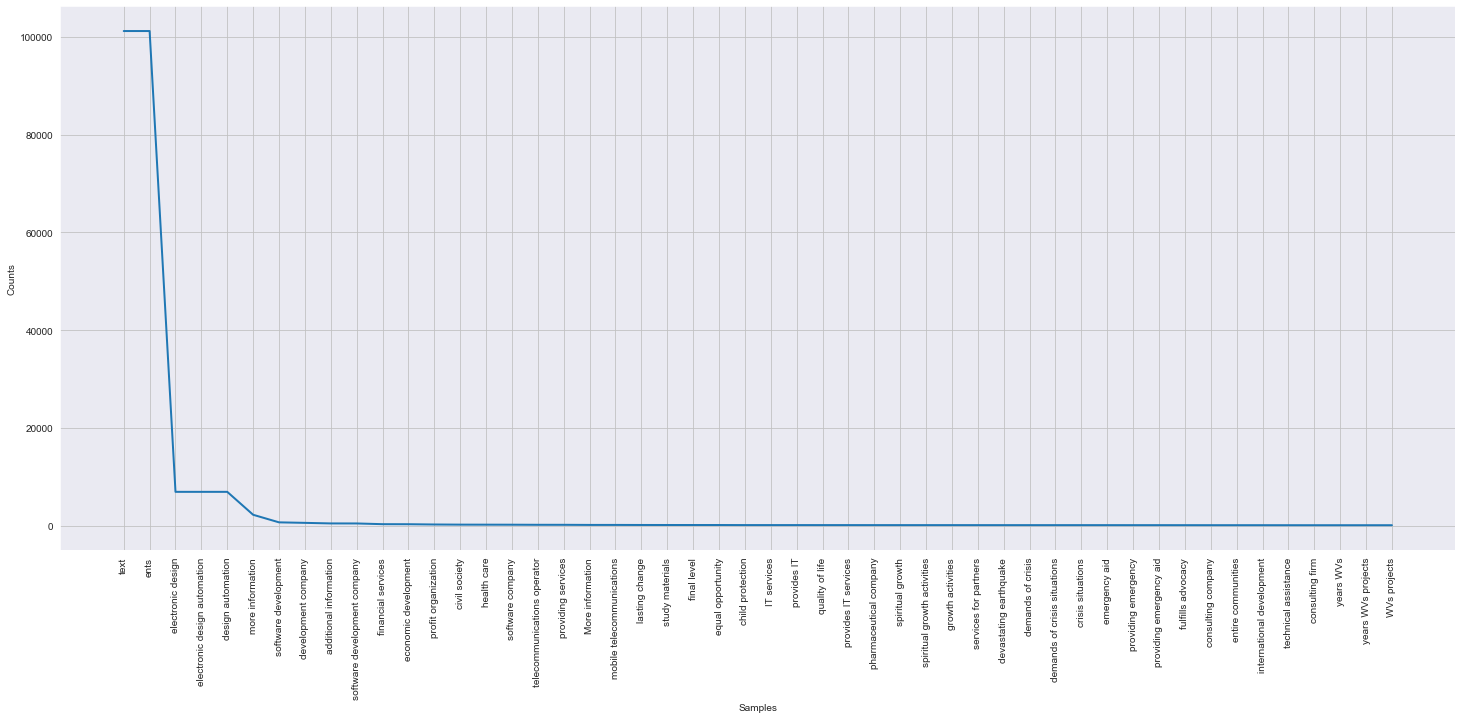

In [195]:
plt.figure(figsize=(25, 10))
fd = nltk.FreqDist(flat_list)  # case sensitive!
fd.most_common(50)
fd.plot(50)
plt.show()

# Job Similarity

In [196]:
df1=data_jobpost_1[['jobpost','Title','JobRequirment','JobDescription','RequiredQual']]

# Using TF-IDF

In [197]:
df1['JobDescription_token'] = df1['JobDescription'].astype(str).map(word_tokenize)
df1['RequiredQual_token'] = df1['RequiredQual'].astype(str).map(word_tokenize)
df1['JobRequirment_token'] = df1['JobRequirment'].astype(str).map(word_tokenize)

In [198]:
tfidf_model = TfidfVectorizer()
Title_tfidf = tfidf_model.fit_transform(df1['Title'].astype(str))
JobDescription_tfidf = tfidf_model.fit_transform(df1['JobDescription'].astype(str))
RequiredQual_tfidf = tfidf_model.fit_transform(df1['RequiredQual'].astype(str))
JobRequirment_tfidf = tfidf_model.fit_transform(df1['JobRequirment'].astype(str))

In [199]:
def find_similar_jobs_tfidf(index, top_n = 5):
    Title_tfidf_cosine = cosine_similarity(Title_tfidf[index:index+1], Title_tfidf).flatten()
    JobDescription_tfidf_cosine = cosine_similarity(JobDescription_tfidf[index:index+1], JobDescription_tfidf).flatten()
    RequiredQual_tfidf_cosine = cosine_similarity(RequiredQual_tfidf[index:index+1], RequiredQual_tfidf).flatten()
    JobRequirment_tfidf_cosine = cosine_similarity(JobRequirment_tfidf[index:index+1], JobRequirment_tfidf).flatten()

    average_cosine = (Title_tfidf_cosine +JobDescription_tfidf_cosine+RequiredQual_tfidf_cosine+JobRequirment_tfidf_cosine)/4.0
    related_docs_indices = [i for i in average_cosine.argsort()[::-1] if i != index]
    return [(index, average_cosine[index]) for index in related_docs_indices][0:top_n]

# Chief Financial Officer Jobs

In [200]:
df1.iloc[0]

jobpost                 AMERIA Investment Consulting Company\nJOB TITL...
Title                                             Chief Financial Officer
JobRequirment           - Supervises financial management and administ...
JobDescription          AMERIA Investment Consulting Company is seekin...
RequiredQual            To perform this job successfully, an\nindividu...
JobDescription_token    [AMERIA, Investment, Consulting, Company, is, ...
RequiredQual_token      [To, perform, this, job, successfully, ,, an, ...
JobRequirment_token     [-, Supervises, financial, management, and, ad...
Name: 0, dtype: object

In [201]:
for index, score in find_similar_jobs_tfidf(0):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Organization for Implementation of North-South...
Title                                             Chief Financial Officer
JobRequirment           Financial management of the NSRCIP T1 & T2 pro...
JobDescription          The Chief Financial Officer (CFO) will support...
RequiredQual            - Degree in Accounting, Finance, Business, Law...
JobDescription_token    [The, Chief, Financial, Officer, (, CFO, ), wi...
RequiredQual_token      [-, Degree, in, Accounting, ,, Finance, ,, Bus...
JobRequirment_token     [Financial, management, of, the, NSRCIP, T1, &...
Name: 12368, dtype: object
SIMILARITY SCORE:  0.5089527326331377
jobpost                 River Island\nTITLE:  Chief Financial Officer\...
Title                                             Chief Financial Officer
JobRequirment           - Develop tools and systems to provide critica...
JobDescription          River Island is seeking a Chief Financial Offi...
RequiredQual            - Master's degree in Ma

# International Research & Exchanges Board Jobs

In [202]:
df1.iloc[1]

jobpost                 International Research & Exchanges Board (IREX...
Title                   Full-time Community Connections Intern (paid i...
JobRequirment                                                         NaN
JobDescription                                                        NaN
RequiredQual            - Bachelor's Degree; Master's is preferred;\n-...
JobDescription_token                                                [nan]
RequiredQual_token      [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
JobRequirment_token                                                 [nan]
Name: 1, dtype: object

In [203]:
for index, score in find_similar_jobs_tfidf(1):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Military Institute MoD RA\nJOB TITLE:   IT Tea...
Title                                             IT Teacher  (full time)
JobRequirment                                                         NaN
JobDescription                                                        NaN
RequiredQual            - Degree in Computer Science, Information Tech...
JobDescription_token                                                [nan]
RequiredQual_token      [-, Degree, in, Computer, Science, ,, Informat...
JobRequirment_token                                                 [nan]
Name: 114, dtype: object
SIMILARITY SCORE:  0.6688517798124234
jobpost                 International Research & Exchanges Board (IREX...
Title                              Administrative and Programmatic Intern
JobRequirment                                                         NaN
JobDescription                                                        NaN
RequiredQual            - Fluency in English and 

# Caucasus Environmental NGO Network job

In [204]:
df1.iloc[2]

jobpost                 Caucasus Environmental NGO Network (CENN)\nJOB...
Title                                                 Country Coordinator
JobRequirment           - Working with the Country Director to provide...
JobDescription          Public outreach and strengthening of a growing...
RequiredQual            - Degree in environmentally related field, or ...
JobDescription_token    [Public, outreach, and, strengthening, of, a, ...
RequiredQual_token      [-, Degree, in, environmentally, related, fiel...
JobRequirment_token     [-, Working, with, the, Country, Director, to,...
Name: 2, dtype: object

In [205]:
for index, score in find_similar_jobs_tfidf(2):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Caucasus Environmental NGO Network\nTITLE:  Co...
Title                                       Country Coordinator - Armenia
JobRequirment           -  Write first hand articles, conduct intervie...
JobDescription          CENN - Caucasus Environmental NGO Network - is...
RequiredQual            1. Education: University education in environm...
JobDescription_token    [CENN, -, Caucasus, Environmental, NGO, Networ...
RequiredQual_token      [1, ., Education, :, University, education, in...
JobRequirment_token     [-, Write, first, hand, articles, ,, conduct, ...
Name: 404, dtype: object
SIMILARITY SCORE:  0.43463797719195596
jobpost                 Veya  Ltd.\n\n\nTITLE:  Country Coordinator\n\...
Title                                                 Country Coordinator
JobRequirment           - Negotiate with potential customers;\n- Lobby...
JobDescription          Veya Ltd. is looking for a qualified Country\n...
RequiredQual            - At least 5 years of ex

# Using Pretrained Word2Vec Embedding 

In [206]:
# Original text - Title
doc1 = nlp(df1.iloc[0]['Title'])
doc2 = nlp(df1.iloc[2]['Title'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
Chief Financial Officer 

DOC2:
 Country Coordinator 

 0.5695963298609183


In [207]:
# Original text - RequiredQual
doc1 = nlp(df1.iloc[0]['RequiredQual'])
doc2 = nlp(df1.iloc[2]['RequiredQual'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
To perform this job successfully, an
individual must be able to perform each essential duty satisfactorily.
The requirements listed below are representative of the knowledge,
skill, and/or ability required.
Knowledge of:
- Generally accepted accounting principles;
- Local accounting standards and legislation;
- State reporting requirements pertaining to accounting;
- Principles and practices of financial management and budgeting;
- Principles and practices of financial systems design and analysis;
- Principles and practices of contract management, records management,
and risk management;
- Principles and practices of management and supervision;
- Principles and practices of information systems management.
Ability to:
- Apply sound fiscal and administrative practices to the company's
activities;
- Plan, organize and supervise the work of subordinate employees,
including training them, assigning and evaluating their work, and
providing job performance feedback;
- Critically analyze

In [208]:
# removing stopwords and punctuations
doc1 = nlp(' '.join(df1.iloc[0]['RequiredQual_token']))
doc2 = nlp(' '.join(df1.iloc[2]['RequiredQual_token']))
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
To perform this job successfully , an individual must be able to perform each essential duty satisfactorily . The requirements listed below are representative of the knowledge , skill , and/or ability required . Knowledge of : - Generally accepted accounting principles ; - Local accounting standards and legislation ; - State reporting requirements pertaining to accounting ; - Principles and practices of financial management and budgeting ; - Principles and practices of financial systems design and analysis ; - Principles and practices of contract management , records management , and risk management ; - Principles and practices of management and supervision ; - Principles and practices of information systems management . Ability to : - Apply sound fiscal and administrative practices to the company's activities ; - Plan , organize and supervise the work of subordinate employees , including training them , assigning and evaluating their work , and providing job performance feedback

# POS + RegexMatcher

In [209]:
matcher = Matcher(nlp.vocab)

In [210]:
def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })

In [211]:
patn1 = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn2 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn3 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
patn4 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
patn5 = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
patn6 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
patn7 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
patn8 = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
patn9 = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
patn10 = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
patn11 = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]

In [212]:
matcher.add('all', collect_sents, patn1, patn2, patn3, patn4, patn5, patn6, patn7, patn8, patn9, patn10, patn11)

In [213]:
# RequiredQual
for job1_idx in range(df1.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(df1.iloc[job1_idx]['RequiredQual']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df1.set_value(job1_idx, 'RequiredQual_keywords', " ".join(keywords))

In [214]:
# JobDescription
for job1_idx in range(df1.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(df1.iloc[job1_idx]['JobDescription']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df1.set_value(job1_idx, 'JobDescription_keywords', " ".join(keywords))

In [215]:
# JobRequirment
for job1_idx in range(df1.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(df1.iloc[job1_idx]['JobRequirment']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df1.set_value(job1_idx, 'JobRequirment_keywords', " ".join(keywords))

In [216]:
df1.head(5)

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,JobDescription_token,RequiredQual_token,JobRequirment_token,RequiredQual_keywords,JobDescription_keywords,JobRequirment_keywords
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\nindividu...","[AMERIA, Investment, Consulting, Company, is, ...","[To, perform, this, job, successfully, ,, an, ...","[-, Supervises, financial, management, and, ad...",essential duty accepted accounting accepted ac...,administrative functions complex staff complex...,financial management administrative staff incl...
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,[nan],"[-, Bachelor, 's, Degree, ;, Master, 's, is, p...",[nan],Excellent skills Armenian languages Armenian t...,,
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...","[Public, outreach, and, strengthening, of, a, ...","[-, Degree, in, environmentally, related, fiel...","[-, Working, with, the, Country, Director, to,...",related field relevant experience written flue...,Public outreach growing network international ...,environmental information general public elect...
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,- Identify gaps in knowledge and overseeing in...,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...","[The, LEAD, (, Local, Enhancement, and, Develo...","[-, Advanced, degree, in, public, health, ,, s...","[-, Identify, gaps, in, knowledge, and, overse...",Advanced degree public health social science r...,apply state art approaches address provider ca...,Identify gaps gaps in knowledge overseeing inf...
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,- Rendering technical assistance to Database M...,NaN,- University degree; economical background is ...,[nan],"[-, University, degree, ;, economical, backgro...","[-, Rendering, technical, assistance, to, Data...",economical background Excellent knowledge year...,,technical assistance servers maintenance serve...


In [217]:
job_dissimilarity_df = pd.DataFrame(columns=['index', 'similar-job', 'dissimilar-score'])

In [218]:
for job1_idx in range(3):  # rows
    for job2_idx in range(1000):

        doc1 = nlp(df1.iloc[job1_idx]['Title'])
        doc2 = nlp(str(df1.iloc[job2_idx]['Title']))
        title_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['JobDescription_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['JobDescription_keywords'])
        jd_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['JobRequirment_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['JobRequirment_keywords'])
        jr_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['RequiredQual_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['RequiredQual_keywords'])
        rq_similarity = doc1.similarity(doc2)
        
        averaged_score = (title_similarity + jd_similarity + jr_similarity + rq_similarity) / 4.0
        job_dissimilarity_df = job_dissimilarity_df.append({'index': job1_idx, 'similar-job': job2_idx, 'dissimilar-score': (1-averaged_score)},ignore_index=True)

In [219]:
# Top similar jobs
job_dissimilarity_df_sorted = job_dissimilarity_df.sort_values(by=['index', 'dissimilar-score'], ascending=[True, True])
job_dissimilarity_df_sorted

,index,similar-job,dissimilar-score
0,0.0,0.0,0.000000
697,0.0,697.0,0.045436
302,0.0,302.0,0.086393
234,0.0,234.0,0.098685
126,0.0,126.0,0.111020
...,...,...,...
2011,2.0,11.0,0.901845
2224,2.0,224.0,0.908497
2007,2.0,7.0,0.909804
2068,2.0,68.0,0.912250


In [220]:
# Show top 5 similar results to job - Ameria Investment Consulting Job
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 0].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df1.iloc[int(job)].replace(r'\n',' ', regex=True))

jobpost                    AMERIA Investment Consulting Company JOB TITLE...
Title                                                Chief Financial Officer
JobRequirment              - Supervises financial management and administ...
JobDescription             AMERIA Investment Consulting Company is seekin...
RequiredQual               To perform this job successfully, an individua...
JobDescription_token       [AMERIA, Investment, Consulting, Company, is, ...
RequiredQual_token         [To, perform, this, job, successfully, ,, an, ...
JobRequirment_token        [-, Supervises, financial, management, and, ad...
RequiredQual_keywords      essential duty accepted accounting accepted ac...
JobDescription_keywords    administrative functions complex staff complex...
JobRequirment_keywords     financial management administrative staff incl...
Name: 0, dtype: object
jobpost                    Cascade Capital Holdings CJSC TITLE:  Chief Fi...
Title                                                

In [221]:
# Show top 5 similar results to job - International Research & Exchange Board
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 1].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df1.iloc[int(job)].replace(r'\n',' ', regex=True)) 

jobpost                    International Research & Exchanges Board (IREX...
Title                      Full-time Community Connections Intern (paid i...
JobRequirment                                                            NaN
JobDescription                                                           NaN
RequiredQual               - Bachelor's Degree; Master's is preferred; - ...
JobDescription_token                                                   [nan]
RequiredQual_token         [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
JobRequirment_token                                                    [nan]
RequiredQual_keywords      Excellent skills Armenian languages Armenian t...
JobDescription_keywords                                                     
JobRequirment_keywords                                                      
Name: 1, dtype: object
jobpost                    Valensia Expo JOB TITLE:   Marketing Specialis...
Title                                 Marketing Speci

In [222]:
# Show top 5 similar results to job - Caucasus Environmental NGO Network
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 2].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df1.iloc[int(job)])

jobpost                    Caucasus Environmental NGO Network (CENN)\nJOB...
Title                                                    Country Coordinator
JobRequirment              - Working with the Country Director to provide...
JobDescription             Public outreach and strengthening of a growing...
RequiredQual               - Degree in environmentally related field, or ...
JobDescription_token       [Public, outreach, and, strengthening, of, a, ...
RequiredQual_token         [-, Degree, in, environmentally, related, fiel...
JobRequirment_token        [-, Working, with, the, Country, Director, to,...
RequiredQual_keywords      related field relevant experience written flue...
JobDescription_keywords    Public outreach growing network international ...
JobRequirment_keywords     environmental information general public elect...
Name: 2, dtype: object
jobpost                    World Vision Armenia\nTITLE:  Health Coordinat...
Title                                                